<a href="https://colab.research.google.com/github/Hsuan7/homework/blob/main/%E9%87%91%E8%9E%8D%E5%A4%A7%E6%95%B8%E6%93%9Aw6_%E6%99%82%E9%96%93%E5%BA%8F%E5%88%97%E3%80%81%E9%87%8F%E5%8C%96%E4%BA%A4%E6%98%93%E7%AD%96%E7%95%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件
from sklearn.metrics import mean_squared_error # 計算 mse 誤差
import matplotlib.pyplot as plt # 畫圖套件
import numpy as np # 數值計算套件

In [2]:
# 輸入股票代號
stock_id = "2330.tw"
# stock_id = "2357.tw"
# stock_id = "AAPL"
# stock_id = "NVDA"

'''今天往前算幾天'''
# 資料結束時間
end = dt.date.today()
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=180)

'''抓取特定時間'''
# start = dt.datetime(2024, 1, 1)  # 指定的開始日期
# end = dt.datetime(2024, 6, 30)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
data = yf.download(stock_id, start=start, end=end).reset_index()

df = data.copy()
df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-04-26,788.0,789.0,782.0,782.0,775.530823,32571247
1,2024-04-29,790.0,795.0,787.0,795.0,788.423279,26765837
2,2024-04-30,797.0,802.0,790.0,790.0,783.464661,39051972
3,2024-05-02,789.0,789.0,772.0,772.0,765.613525,40527228
4,2024-05-03,788.0,788.0,773.0,780.0,773.547363,29901556
...,...,...,...,...,...,...,...
114,2024-10-15,1050.0,1075.0,1050.0,1070.0,1070.000000,42850176
115,2024-10-16,1040.0,1070.0,1035.0,1045.0,1045.000000,52652149
116,2024-10-17,1050.0,1055.0,1030.0,1035.0,1035.000000,54173771
117,2024-10-18,1095.0,1100.0,1075.0,1085.0,1085.000000,85011961


# 建立ARIMA模型，預測股票價格，並進行可視化


In [3]:
# 不更動原始資料：
# 將原始資料複製出一份給統計學模型使用
df_stat = df.copy()  # 給統計模型使用的資料副本

In [4]:
# 將日期欄位轉為datetime格式
df_stat['Date'] = pd.to_datetime(df_stat['Date'])
# 將日期欄位設為索引
df_stat.set_index('Date', inplace=True)

df_stat

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-26,788.0,789.0,782.0,782.0,775.530823,32571247
2024-04-29,790.0,795.0,787.0,795.0,788.423279,26765837
2024-04-30,797.0,802.0,790.0,790.0,783.464661,39051972
2024-05-02,789.0,789.0,772.0,772.0,765.613525,40527228
2024-05-03,788.0,788.0,773.0,780.0,773.547363,29901556
...,...,...,...,...,...,...
2024-10-15,1050.0,1075.0,1050.0,1070.0,1070.000000,42850176
2024-10-16,1040.0,1070.0,1035.0,1045.0,1045.000000,52652149
2024-10-17,1050.0,1055.0,1030.0,1035.0,1035.000000,54173771


In [5]:
# 選擇收盤價作為預測目標
close_prices = df_stat['Close']

# 拆分資料分為訓練集(70%) 和測試集(30%)
train_size = int(len(close_prices) * 0.7)
train, test = close_prices[:train_size], close_prices[train_size:]

print(f"訓練集長度: {len(train)}")
print(f"測試集長度: {len(test)}")

訓練集長度: 83
測試集長度: 36


--2024-10-23 12:40:43--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.216.139, 173.194.216.138, 173.194.216.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.216.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-10-23 12:40:43--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.98.132, 2607:f8b0:400c:c1a::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.98.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  68.7MB/s    in 0.3s    

2024-10-23 12

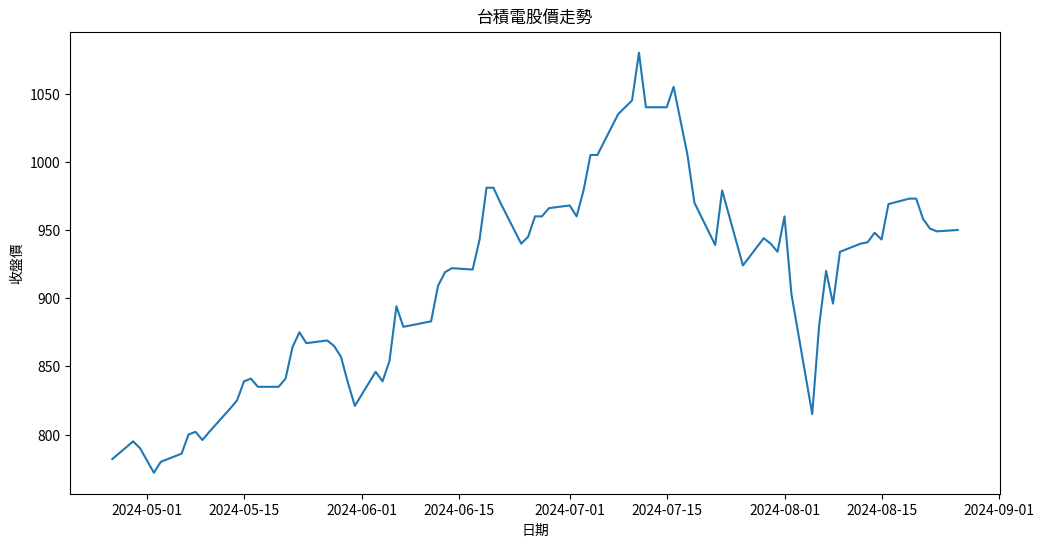

In [6]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib
matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.title('台積電股價走勢')
plt.xlabel('日期')
plt.ylabel('收盤價')
plt.show()

In [7]:
# ADF檢定-檢查平穩性
from statsmodels.tsa.stattools import adfuller  # 匯入 ADF 檢定函數

result = adfuller(train)
print(f'ADF 統計量: {result[0]}')
print(f'p-value: {result[1]}')

# 如果 p-value<0.05，則數據是平穩的
# 否則，需要進行差分處理


ADF 統計量: -2.074450042764088
p-value: 0.2549116782715357


In [8]:
'''
# 差分檢定 如果數據非平穩，進行一階差分
data_diff = data.diff().dropna()

# 再次進行 ADF 檢定
result = adfuller(data_diff)
print('ADF 統計量（差分後）：', result[0])
print('p-value（差分後）：', result[1])
'''

"\n# 差分檢定 如果數據非平穩，進行一階差分\ndata_diff = data.diff().dropna()\n\n# 再次進行 ADF 檢定\nresult = adfuller(data_diff)\nprint('ADF 統計量（差分後）：', result[0])\nprint('p-value（差分後）：', result[1])\n"

In [9]:
# 確定模型階數
from statsmodels.tsa.arima.model import ARIMA  # 引入 ARIMA 模型
from math import sqrt  # 引入數學根號
import warnings  # 用來忽略警告訊息（可選）
warnings.filterwarnings("ignore")  # 忽略警告訊息


# 優化 ARIMA 模型參數的函數
def optimize_arima(train, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    best_model = None
    # 使用迴圈迭代 p, d, q 組合找出最佳參數
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    # order=(p, d, q)：非季節性ARIMA部分的參數，p 代表自回歸項，d 代表差分階數，q 代表移動平均項。
                    model = ARIMA(train, order=(p, d, q))

                    # 模型擬合
                    model_fit = model.fit()
                    yhat = model_fit.forecast(steps=len(test))

                    # 計算誤差RMSE
                    error = sqrt(mean_squared_error(test, yhat))

                    # 比較當前誤差與最好模型的誤差，存取最好的模型
                    if error < best_score:
                        # 存取最低的誤差分數, 存取最好的 p, d, q 參數
                        best_score, best_cfg = error, (p, d, q)
                        # 存取最好的模型
                        best_model = model_fit
                except:
                    continue

    return best_cfg, best_model

# 定義 p, d, q 參數範圍
p_values = range(0, 6)
d_values = range(0, 3)
q_values = range(0, 6)

# 找出 ARIMA 模型最佳參數
best_cfg, best_model = optimize_arima(train, p_values, d_values, q_values)

# 印出最佳参数
print(f'最佳參數 {best_cfg}')

最佳參數 (5, 2, 1)


In [10]:
# 預測
yhat = best_model.forecast(steps=len(test))

# 計算誤差RMSE
rmse_optimized = sqrt(mean_squared_error(test, yhat))

# 印出誤差RMSE
print(f"RMSE: {rmse_optimized}")

RMSE: 37.58724090135811


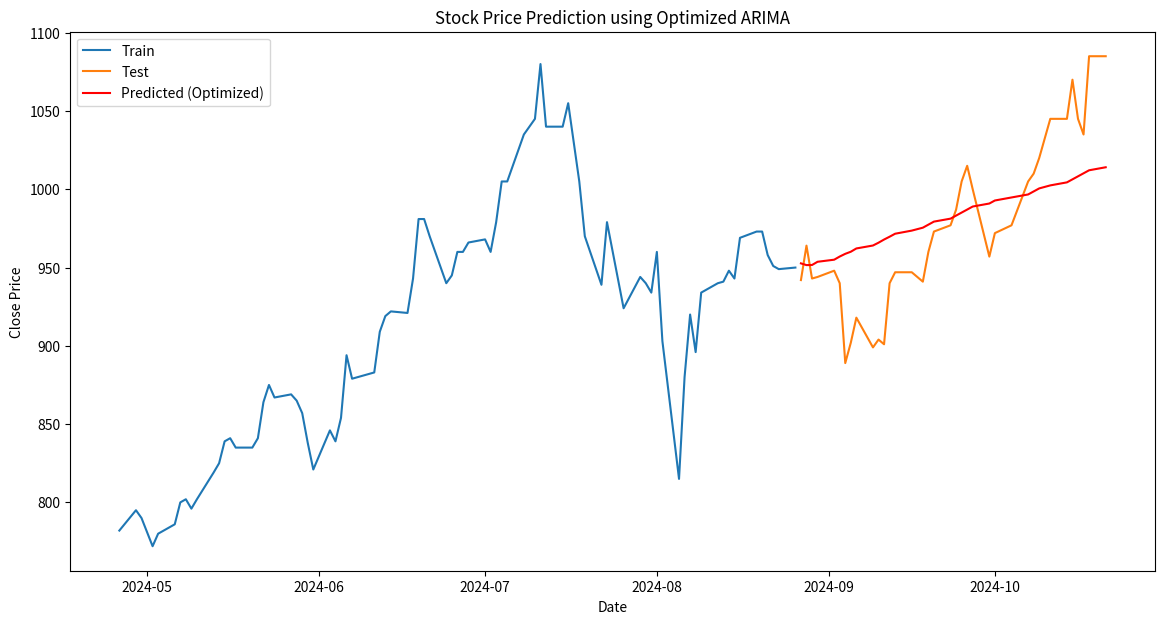

In [11]:
# 繪製折線圖
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, yhat, color='red', label='Predicted (Optimized)')
plt.title('Stock Price Prediction using Optimized ARIMA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# 量化交易策略


## 均值回歸策略

**如何產生買入和賣出信號？**

* 黃金交叉（Golden Cross）：當短期移動平均線（短期 MA）從下方突破長期移動平均線（長期 MA），這被認為是一個買入信號。這代表著短期內價格上升的趨勢開始超過長期趨勢，市場可能進入一個上漲階段。

* 死亡交叉（Death Cross）：當短期 MA從上方跌破長期 MA，這被認為是一個賣出信號。這代表著短期內的價格趨勢弱於長期趨勢，市場可能進入下跌階段。

[*********************100%***********************]  1 of 1 completed


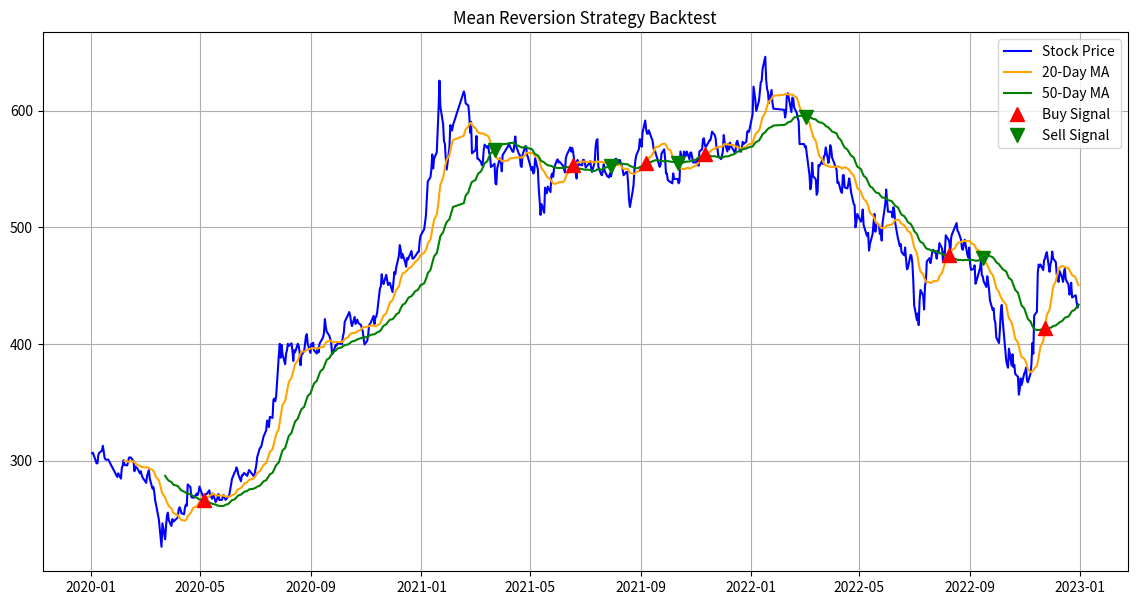

In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 下載股票資料
stock_id = '2330.TW'
start = '2020-01-01'
end = '2023-01-01'
data = yf.download(stock_id, start=start, end=end)

# 計算短期和長期移動平均
short_window = 20
long_window = 50

data['Short_MA'] = data['Adj Close'].rolling(window=short_window).mean()  # 短期均線
data['Long_MA'] = data['Adj Close'].rolling(window=long_window).mean()   # 長期均線

# 設置買賣信號
data['Signal'] = 0
data.loc[data['Short_MA'] > data['Long_MA'], 'Signal'] = 1  # 買入信號
data.loc[data['Short_MA'] < data['Long_MA'], 'Signal'] = -1  # 賣出信號

# 持倉計算
data.iloc[short_window:, data.columns.get_loc('Signal')] = (
        data['Short_MA'].iloc[short_window:] > data['Long_MA'].iloc[short_window:]
    ).astype('int64')

data['Position'] = data['Signal'].diff()

# 可視化結果
plt.figure(figsize=(14, 7))
plt.plot(data['Adj Close'], label='Stock Price', color='blue')
plt.plot(data['Short_MA'], label='20-Day MA', color='orange')
plt.plot(data['Long_MA'], label='50-Day MA', color='green')

# 標註買賣點
plt.plot(data[data['Position'] == 1].index,
   data['Short_MA'][data['Position'] == 1],
    '^', markersize=10, color='r', lw=0, label='Buy Signal')

plt.plot(data[data['Position'] == -1].index,
      data['Short_MA'][data['Position'] == -1],
      'v', markersize=10, color='g', lw=0, label='Sell Signal')

plt.title('Mean Reversion Strategy Backtest')
plt.legend(loc='best')
plt.grid(True)
plt.show()



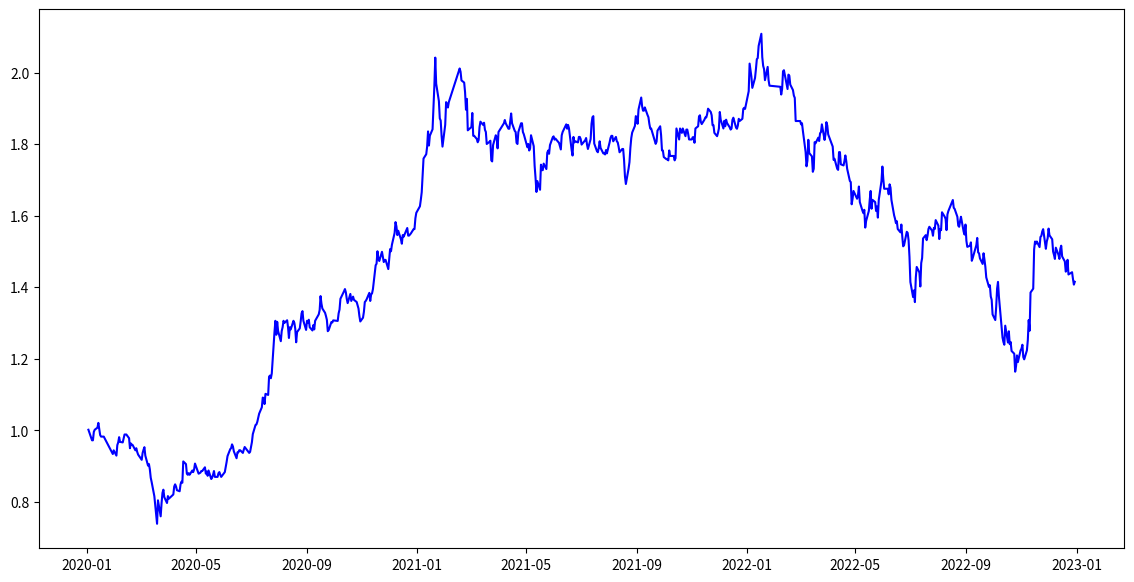

In [20]:
# 回測策略
def backtest_strategy(data):
    # 計算每日回報率
    data['Return'] = data['Adj Close'].pct_change()

    # 計算策略回報率
    data['Strategy_Return'] = data['Signal'].shift() * data['Return']

    # 計算累積回報
    data['Cumulative_Return'] = (1 + data['Return']).cumprod()  # 買入並持有策略
    data['Cumulative_Strategy_Return'] = (1 + data['Strategy_Return']).cumprod()  # 策略回報

    return data

# 應用回測
data = backtest_strategy(data)

# 7. 可視化策略回報和累積回報
plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative_Return'], label='Buy and Hold Strategy', color='blue')


## 動量策略
**動量策略的基本概念**

1. 趨勢延續：動量策略假設「趨勢具有延續性」。這意味著當某種資產的價格在過去一段時間內持續上升或下降，這個趨勢很有可能在短期內繼續維持。因此，動量策略會根據資產的歷史表現來預測未來的價格變動方向。

2. 上升買入，下降賣出：動量策略的操作原則是「追漲殺跌」：
    * 買入信號：當價格顯示出持續上升的動能時，投資者會進場買入，以期未來價格能夠進一步上漲。
    * 賣出信號：當價格顯示出下降的動能時，投資者會賣出持有的資產，預防價格繼續下跌。

[*********************100%***********************]  1 of 1 completed


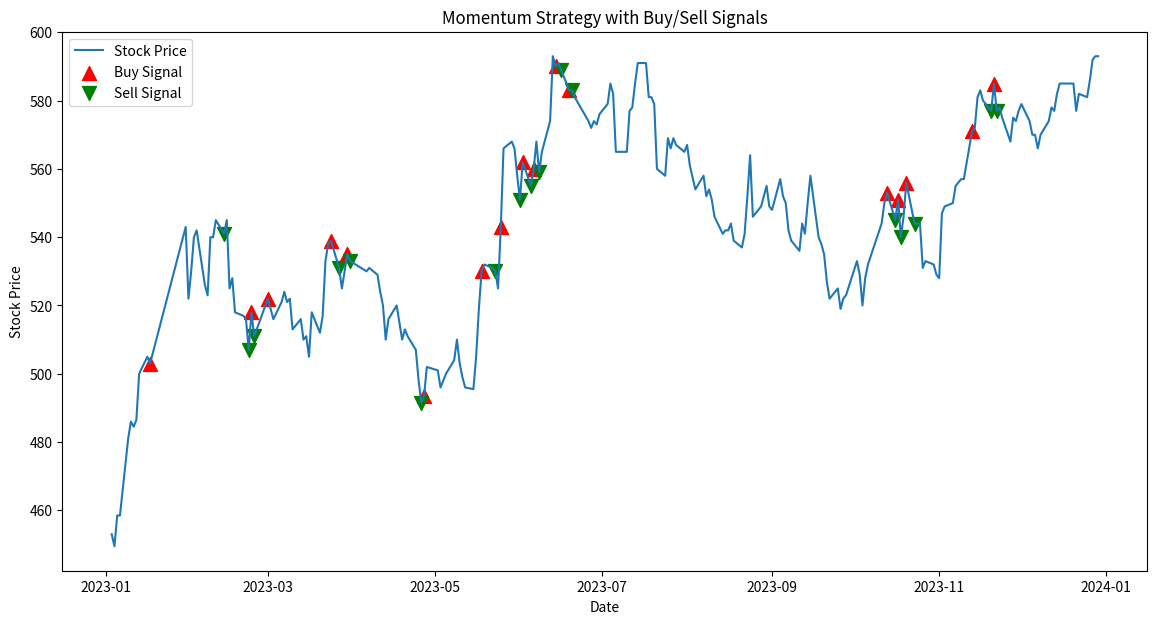

In [22]:
# 下載股票資料
stock_id = '2330.TW'
start = '2023-01-01'
end = '2024-01-01'
data = yf.download(stock_id, start=start, end=end)

# 計算動量策略，設置動量窗口和閾值
window = 10  # 動量窗口（10天）
threshold = 5  # 動量閾值（5%）

# 計算動量：基於過去 window 天的百分比變化
data['Momentum'] = data['Close'].pct_change(window) * 100  # 計算百分比變化

# 初始化訊號
data['Signal'] = 0

# 設定當動量變化超過閾值時觸發交易信號
data.iloc[window:, data.columns.get_loc('Signal')] = [
    1 if momentum > threshold else -1 if momentum < -threshold else 0
    for momentum in data['Momentum'].iloc[window:]
]
# 計算倉位變化（訊號變化觸發買賣操作）
data['Position'] = data['Signal'].diff()

# 可視化回測結果
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Stock Price')

# 標註買賣點
buy_signals = data[data['Position'] == 1]
sell_signals = data[data['Position'] == -1]

plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='r', label='Buy Signal', s=100)
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='g', label='Sell Signal', s=100)

plt.title('Momentum Strategy with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()



In [23]:
def backtest_strategy(data):
    # 計算每日回報率
    data['Return'] = data['Close'].pct_change()

    # 計算策略回報率
    data['Strategy_Return'] = data['Signal'].shift() * data['Return']  # 使用前一日的信號來計算當日回報

    # 計算累積回報
    data['Cumulative_Return'] = (1 + data['Return']).cumprod()  # 買入並持有策略的累積回報
    data['Cumulative_Strategy_Return'] = (1 + data['Strategy_Return']).cumprod()  # 策略回報

    return data

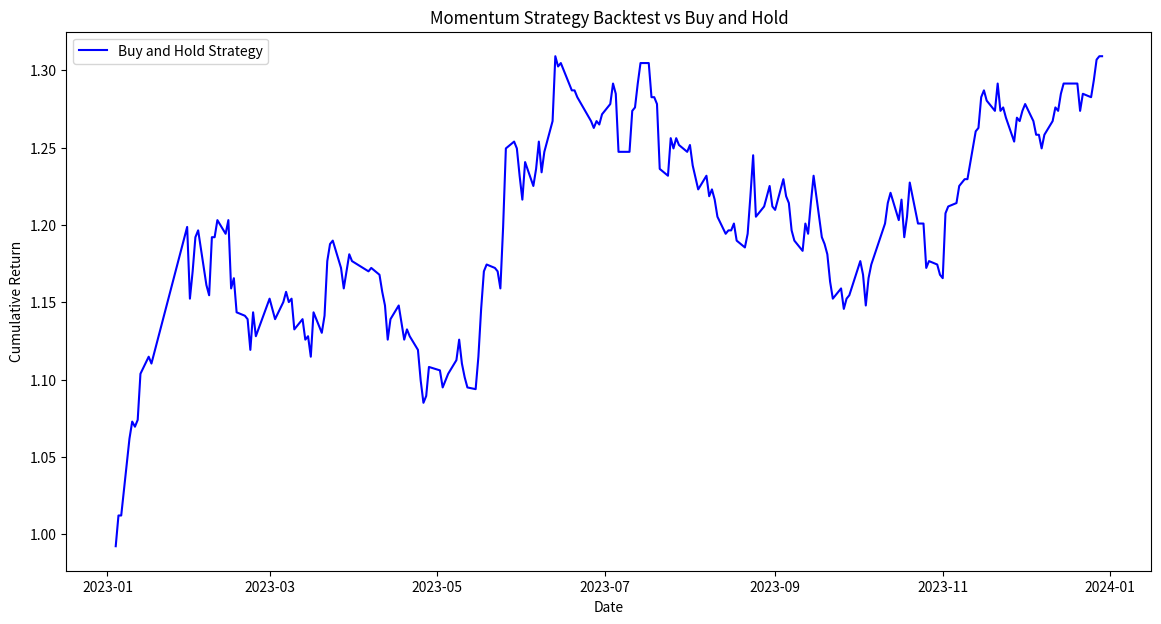

In [24]:
data = backtest_strategy(data)
# 7. 可視化策略回報和累積回報
plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative_Return'], label='Buy and Hold Strategy', color='blue')
#plt.plot(data['Cumulative_Strategy_Return'], label='Momentum Strategy', color='orange')


plt.title('Momentum Strategy Backtest vs Buy and Hold')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()
